In [62]:
from Src.tf_data_split import DatasetSplitter
from Src.visualize_confusion_matrix import evaluate_model

from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

import os 
import sklearn
import imblearn
import matplotlib
import unicodedata
import spacy

import tensorflow as tf 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import stopwordsiso as sw

print(f'stopwordsiso version: {sw.__version__}')
print(f'tensorflow version: {tf.__version__}')
print(f'sklearn version: {sklearn.__version__}')
print(f'imblearn version: {imblearn.__version__}')
print(f'numpy version: {np.__version__}')
print(f'pandas version: {pd.__version__}')
print(f'matplotlib version: {matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'spacy version: {spacy.__version__}')

file_path = '../Assets/Datasets/SMSSpamCollection'

stopwordsiso version: 0.6.1
tensorflow version: 2.17.0
sklearn version: 1.5.1
imblearn version: 0.12.3
numpy version: 1.26.2
pandas version: 2.1.3
matplotlib version: 3.9.0
seaborn version: 0.13.2
spacy version: 3.7.5


In [2]:
df = pd.read_csv(file_path, sep='\t', names=['label', 'message'])

In [3]:
df[:5]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Tokenisasi dalam Pemrosesan Bahasa Alami

Tokenisasi adalah langkah awal dalam pemrosesan bahasa alami (Natural Language Processing atau NLP). Proses ini mengubah teks menjadi daftar token. Token adalah unit dasar dari teks yang bisa berupa kata, karakter, atau bahkan kalimat. Mari kita bahas lebih detail dengan cara yang mudah dipahami.

#### Apa Itu Tokenisasi?

Bayangkan kamu punya sebuah kalimat: "Saya suka belajar NLP." Untuk memproses kalimat ini, komputer perlu memecahnya menjadi bagian-bagian yang lebih kecil yang disebut token. Ada beberapa cara untuk melakukan ini:

1. **Tokenisasi Kata**: Memecah kalimat menjadi kata-kata terpisah.
   - Contoh: "Saya suka belajar NLP." menjadi ["Saya", "suka", "belajar", "NLP"]

2. **Tokenisasi Karakter**: Memecah kalimat menjadi karakter-karakter terpisah.
   - Contoh: "Saya suka belajar NLP." menjadi ["S", "a", "y", "a", " ", "s", "u", "k", "a", " ", "b", "e", "l", "a", "j", "a", "r", " ", "N", "L", "P"]

#### Mengapa Tokenisasi Penting?

Tokenisasi penting karena membantu komputer memahami dan memproses teks dengan lebih baik. Dengan memecah teks menjadi bagian-bagian kecil, komputer bisa menganalisis dan bekerja dengan setiap bagian secara lebih efisien.

#### Tantangan dalam Tokenisasi

Tokenisasi bisa menjadi rumit, terutama dalam bahasa seperti Jepang dan Mandarin. Dalam bahasa-bahasa ini, tidak ada spasi antara kata-kata, sehingga sulit untuk menentukan di mana satu kata berakhir dan kata berikutnya dimulai.

#### Contoh Visual

Bayangkan kamu punya kalimat: 
"Belajar NLP itu menyenangkan."

- **Tokenisasi Kata**: ["Belajar", "NLP", "itu", "menyenangkan"]
- **Tokenisasi Karakter**: ["B", "e", "l", "a", "j", "a", "r", " ", "N", "L", "P", " ", "i", "t", "u", " ", "m", "e", "n", "y", "e", "n", "a", "n","g","k","a","n"]

Dengan memahami tokenisasi, kamu sudah mengambil langkah pertama dalam memahami bagaimana komputer memproses bahasa manusia!

### Segmentasi dalam Bahasa Jepang

Segmentasi adalah proses memisahkan teks menjadi unit-unit yang lebih kecil, seperti kata atau frasa. Dalam banyak bahasa, pemisahan ini dilakukan dengan menggunakan spasi. Namun, dalam bahasa seperti Jepang dan Mandarin, tidak ada pemisah antar kata, sehingga proses ini menjadi lebih rumit dan disebut segmentasi.

#### Karakter dalam Bahasa Jepang

Bahasa Jepang menggunakan tiga jenis karakter utama:
1. **Hiragana**: Digunakan untuk elemen gramatikal dan kata-kata asli Jepang.
2. **Kanji**: Diadaptasi dari karakter Tiongkok dan terdiri dari ribuan karakter.
3. **Katakana**: Digunakan terutama untuk kata-kata asing dan nama.

#### Tantangan Segmentasi

Karena tidak ada spasi antar kata, menentukan di mana satu kata berakhir dan kata berikutnya dimulai bisa sangat sulit. Misalnya, sebuah karakter bisa menjadi bagian dari kata yang sudah ada atau awal dari kata baru, tergantung pada karakter sebelumnya.

#### Contoh Segmentasi

Mari kita lihat contoh kata majemuk dalam bahasa Jepang yang berarti "Komite Administrasi Pemilihan" ((選挙管理委員会)):
- **Segmentasi 1**: 選挙 (Pemilihan) / 管理 (Administrasi) / 委員会 (Komite)
- **Segmentasi 2**: 選挙 (Pemilihan) / 管理 (Administrasi) / 委員会 (Komite) /会議 (Pertemuan)

#### Alat Segmentasi

Ada beberapa perpustakaan yang digunakan khusus untuk segmentasi atau tokenisasi bahasa Jepang:
- **MeCab**
- **Juman**
- **Sudachi**
- **Kuromoji**

MeCab sering digunakan dalam berbagai perpustakaan NLP seperti Hugging Face dan spaCy.

#### Mengapa Segmentasi Penting?

Segmentasi penting karena membantu komputer memahami teks dalam bahasa yang tidak memiliki pemisah antar kata. Dengan segmentasi yang tepat, komputer dapat menganalisis teks dengan lebih akurat dan efisien.

---
#### Untungnya, sebagian besar bahasa tidak serumit bahasa Jepang dan menggunakan spasi untuk memisahkan kata. Dalam Python, pemisahan dengan spasi adalah hal yang sepele.  Mari kita ambil sebuah contoh:
---

In [4]:
sample_text = 'Go until jurong point, crazy.. Available only in bugis n great world'
sample_text.split(sep=' ')

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world']

In [5]:
# spacy.cli.download("en_core_web_sm")

In [6]:
# Load English NLP pipeline
en_nlp = spacy.load("en_core_web_sm")
tokenized = en_nlp(sample_text)

In [43]:
# Iterasi melalui kalimat dan kata-kata
count = 0
for sentence in tokenized.sents:
    for token in sentence:
        count += len(token)
        print(token)
    print("<End of Sentence>")
count

Go
until
jurong
point
,
crazy
..
<End of Sentence>
Available
only
in
bugis
n
great
world
<End of Sentence>


57

### Japanese Tokenization Example

In [8]:
# spacy.cli.download("ja_core_news_sm")

In [9]:
# Load English NLP pipeline
jp_text = "選挙管理委員会"
jp_nlp = spacy.load("ja_core_news_sm")
jp_tokenized = jp_nlp(jp_text)

In [44]:
for jp_sentence in jp_tokenized.sents:
    for jp_token in jp_sentence:
        print(jp_token)

選挙
管理
委員
会


### Adding Word Count Feature 

In [25]:
# Normalization functions
# Fungsi untuk menghitung panjang pesan
def message_length(x):
    return len(x)

# Fungsi untuk menghitung jumlah huruf kapital
def num_capitals(x):
    return sum(1 for char in x if char.isupper())

# Fungsi untuk menghitung jumlah tanda baca
def num_punctuation(x):
    return sum(1 for char in x if unicodedata.category(char).startswith('P'))

# Fungsi untuk menghitung jumlah kata per dokumen
def word_counts(x, pipeline=en_nlp):
    doc = pipeline(x)
    return sum([len(sentence) for sentence in doc.sents])

In [26]:
df[:5]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [28]:
df_copy = df.copy(deep=True)
lb = LabelBinarizer()

df_copy['label'] = lb.fit_transform(df_copy['label'])
df_copy['capitals'] = df_copy['message'].apply(num_capitals)
df_copy['punctuation'] = df_copy['message'].apply(num_punctuation)
df_copy['length'] = df_copy['message'].apply(message_length)
df_copy['words'] = df_copy['message'].apply(word_counts)

In [33]:
df_copy[:5]

,label,message,capitals,punctuation,length,words
0,0,"Go until jurong point, crazy.. Available only ...",3,9,111,24
1,0,Ok lar... Joking wif u oni...,2,6,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,10,6,155,31
3,0,U dun say so early hor... U c already then say...,2,6,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",2,2,61,15


In [34]:
df_copy.describe()

,label,capitals,punctuation,length,words
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,5.633345,4.139268,80.489950,18.748744
std,0.340751,11.711637,4.568942,59.942907,13.736345
min,0.000000,0.000000,0.000000,2.000000,1.000000
25%,0.000000,1.000000,2.000000,36.000000,9.000000
50%,0.000000,2.000000,3.000000,62.000000,15.000000
75%,0.000000,4.000000,6.000000,122.000000,27.000000
max,1.000000,138.000000,133.000000,910.000000,196.000000


In [35]:
df_copy['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [36]:
X = df_copy.drop(columns=['label', 'message'])
y = df_copy['label']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [37]:
X_resampled[:5]

,capitals,punctuation,length,words
0,3,9,111,24
1,2,6,29,8
2,10,6,155,31
3,2,6,49,13
4,2,2,61,15


In [38]:
y_resampled[:5]

0    0
1    0
2    1
3    0
4    0
Name: label, dtype: int32

In [16]:
y_resampled.value_counts()

label
0    4825
1    4825
Name: count, dtype: int64

In [17]:
SMSSpamCollection_tf_data = tf.data.Dataset.from_tensor_slices((X_resampled, y_resampled))

In [45]:
print(f'info train data: {SMSSpamCollection_tf_data}')
print(f'number of train data: {len(SMSSpamCollection_tf_data)}')

info train data: <_TensorSliceDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.int64, name=None), TensorSpec(shape=(), dtype=tf.int32, name=None))>
number of train data: 9650


In [46]:
for data, label in SMSSpamCollection_tf_data.skip(0).take(3):
    label_str = lb.inverse_transform(np.array(label))
    print(f'data: {data}')
    print(f'label: {label} --> {label_str[0]}')
    print()

data: [  3   9 111  24]
label: 0 --> ham

data: [ 2  6 29  8]
label: 0 --> ham

data: [ 10   6 155  31]
label: 1 --> spam



In [47]:
def minmax_scaling_tf(data, label, feature_range=(0, 1)):
    data = tf.cast(data, tf.float32)
    label = tf.cast(label, tf.uint8)
    
    min_val = tf.reduce_min(data, axis=0)
    max_val = tf.reduce_max(data, axis=0)
    scale = (feature_range[1] - feature_range[0]) / (max_val - min_val)
    scaled_data = feature_range[0] + scale * (data - min_val)
    return scaled_data, label


In [48]:
SMSSpamCollection_tf_data_scaled = SMSSpamCollection_tf_data.map( 
    map_func=lambda features, label: minmax_scaling_tf(features, label, feature_range=(0, 1)),
    num_parallel_calls=tf.data.AUTOTUNE
)
SMSSpamCollection_tf_data_cached = SMSSpamCollection_tf_data_scaled.cache()

In [49]:
print(f'info train data: {SMSSpamCollection_tf_data_cached}')
print(f'number of train data: {len(SMSSpamCollection_tf_data_cached)}')

info train data: <CacheDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
number of train data: 9650


In [50]:
for data, label in SMSSpamCollection_tf_data_cached.skip(0).take(3):
    label_str = lb.inverse_transform(np.array(label))
    print(f'data: {data}')
    print(f'label: {label} --> {label_str[0]}')
    print()

data: [0.         0.05555556 1.         0.19444445]
label: 0 --> ham

data: [0.         0.14814815 1.         0.22222222]
label: 0 --> ham

data: [0.02684564 0.         1.         0.16778524]
label: 1 --> spam



In [51]:
splitter = DatasetSplitter(batch_size=32, train_split=0.8)

In [52]:
SMSSpamCollection_tf_data_train, SMSSpamCollection_tf_data_valid = splitter.split_and_prepare(SMSSpamCollection_tf_data_cached)

=================================== Training Dataset ===================================
Info data: <_TakeDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
Training Split: 0.8
Number of data: 7720
AFTER BATCH: 32
Number of data: 242
=================================== Validation Dataset ===================================
Info data: <_SkipDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
Validation Split: 0.2
Number of data: 1930
AFTER BATCH: 32
Number of data: 61


In [55]:
def make_model(input_shape=(3,), num_label=1):
    input_layer = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Dense(64, activation='relu')(input_layer)
    x = tf.keras.layers.Dense(32, activation='relu')(x)
    x = tf.keras.layers.Dense(16, activation='relu')(x)
    output_layer = tf.keras.layers.Dense(num_label, activation='sigmoid')(x)
    model = tf.keras.models.Model(inputs=input_layer, outputs=output_layer)
    
    return model

INPUT_SHAPE = (4,)
NUM_LABEL = 1
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ['accuracy']

model = make_model(INPUT_SHAPE, NUM_LABEL)
model.compile(
    loss=LOSS, 
    optimizer=OPTIMIZER, 
    metrics=METRICS
)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
history = model.fit(
    SMSSpamCollection_tf_data_train,
    validation_data=SMSSpamCollection_tf_data_valid,
    epochs=20,
)

Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5837 - loss: 0.6644 - val_accuracy: 0.8280 - val_loss: 0.4462
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8345 - loss: 0.4139 - val_accuracy: 0.8653 - val_loss: 0.3496
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8573 - loss: 0.3545 - val_accuracy: 0.8617 - val_loss: 0.3249
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3522 - val_accuracy: 0.8456 - val_loss: 0.3536
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8539 - loss: 0.3487 - val_accuracy: 0.8549 - val_loss: 0.3477
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8586 - loss: 0.3376 - val_accuracy: 0.8632 - val_loss: 0.3346
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8589 - loss: 0.3426 - val_accuracy: 0.8658 - val_loss: 0.3392
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8567 - loss: 0.3428 - val_accuracy: 0.

In [57]:
# Evaluasi model yang dimuat
loaded_evaluation = model.evaluate(SMSSpamCollection_tf_data_valid)
print(f'Evaluation on validation data (loaded model): {loaded_evaluation}')

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8697 - loss: 0.3002
Evaluation on validation data (loaded model): [0.3084575831890106, 0.8652849793434143]


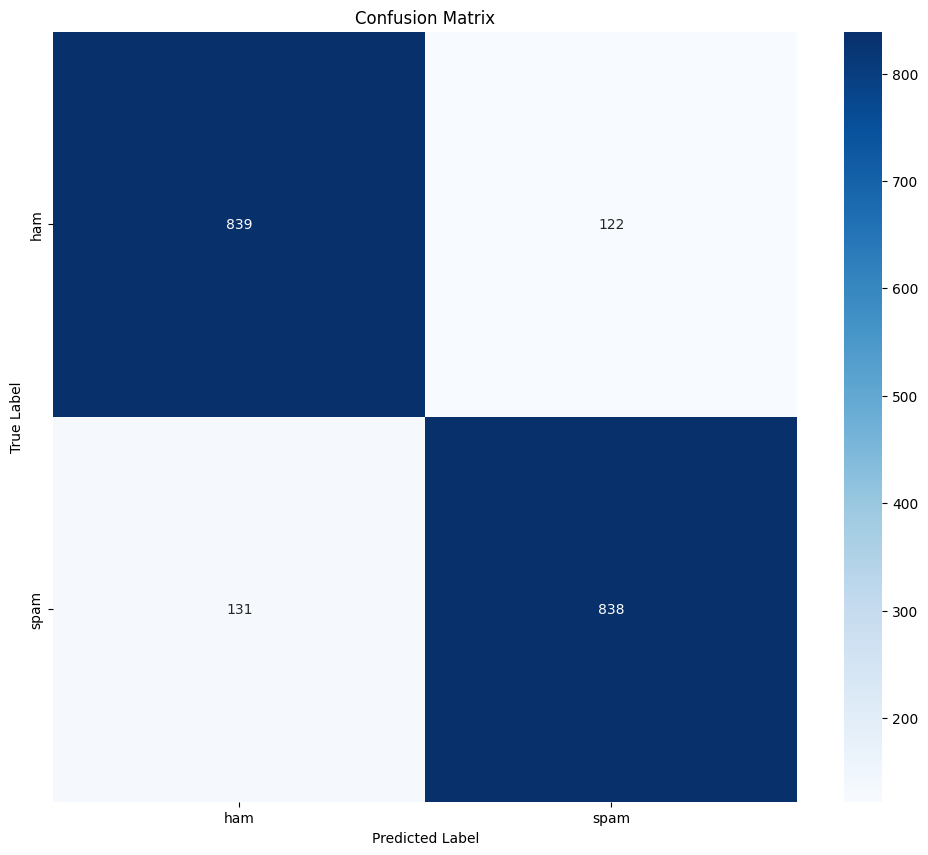

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.87      0.87       961
         1.0       0.87      0.86      0.87       969

    accuracy                           0.87      1930
   macro avg       0.87      0.87      0.87      1930
weighted avg       0.87      0.87      0.87      1930



In [59]:
evaluate_model(model, SMSSpamCollection_tf_data_valid, lb.classes_)

---
#### Setekah melalui Tokenisasi model mengalami peningkatan akurasi, dengan menunjukkan bahwa 839 dari 971 pesan reguler (ham) diklasifikasikan dengan benar, sementara 838 dari 956 pesan spam diklasifikasikan dengan benar.
---

## Stop Word Removal

In [61]:
print(f'available languages: {len(sw.langs())}')

available languages: 58


The list of codes itself is from [www.loc.gov](http://www.loc.gov/standards/iso639-2/php/code_list.php).

| ISO 639-1 Code | Language | Included Here |
| -------------- | -------- | ------------- |
| aa | Afar |  |
| ab | Abkhazian |  |
| af | Afrikaans | ✓ |
| ak | Akan |  |
| sq | Albanian |  |
| am | Amharic |  |
| ar | Arabic | ✓ |
| an | Aragonese |  |
| hy | Armenian | ✓ |
| as | Assamese |  |
| av | Avaric |  |
| ae | Avestan |  |
| ay | Aymara |  |
| az | Azerbaijani |  |
| ba | Bashkir |  |
| bm | Bambara |  |
| eu | Basque | ✓ |
| be | Belarusian |  |
| bn | Bengali | ✓ |
| bh | Bihari languages |  |
| bi | Bislama |  |
| bo | Tibetan |  |
| bs | Bosnian |  |
| br | Breton | ✓ |
| bg | Bulgarian | ✓ |
| my | Burmese |  |
| ca | Catalan; Valencian | ✓ |
| cs | Czech | ✓ |
| ch | Chamorro |  |
| ce | Chechen |  |
| zh | Chinese | ✓ |
| cu | Church Slavic; Old Slavonic; Church Slavonic; Old Bulgarian; Old Church Slavonic |  |
| cv | Chuvash |  |
| kw | Cornish |  |
| co | Corsican |  |
| cr | Cree |  |
| cy | Welsh |  |
| da | Danish | ✓ |
| de | German | ✓ |
| dv | Divehi; Dhivehi; Maldivian |  |
| nl | Dutch; Flemish | ✓ |
| dz | Dzongkha |  |
| el | Greek, Modern (1453-) | ✓ |
| en | English | ✓ |
| eo | Esperanto | ✓ |
| et | Estonian | ✓ |
| ee | Ewe |  |
| fo | Faroese |  |
| fa | Persian | ✓ |
| fj | Fijian |  |
| fi | Finnish | ✓ |
| fr | French | ✓ |
| fy | Western Frisian |  |
| ff | Fulah |  |
| ka | Georgian |  |
| gd | Gaelic; Scottish Gaelic |  |
| ga | Irish | ✓ |
| gl | Galician | ✓ |
| gv | Manx |  |
| gn | Guarani |  |
| gu | Gujarati | ✓ |
| ht | Haitian; Haitian Creole |  |
| ha | Hausa | ✓ |
| he | Hebrew | ✓ |
| hz | Herero |  |
| hi | Hindi | ✓ |
| ho | Hiri Motu |  |
| hr | Croatian | ✓ |
| hu | Hungarian | ✓ |
| ig | Igbo |  |
| is | Icelandic |  |
| io | Ido |  |
| ii | Sichuan Yi; Nuosu |  |
| iu | Inuktitut |  |
| ie | Interlingue; Occidental |  |
| ia | Interlingua (International Auxiliary Language Association) |  |
| id | Indonesian | ✓ |
| ik | Inupiaq |  |
| it | Italian | ✓ |
| jv | Javanese |  |
| ja | Japanese | ✓ |
| kl | Kalaallisut; Greenlandic |  |
| kn | Kannada |  |
| ks | Kashmiri |  |
| kr | Kanuri |  |
| kk | Kazakh |  |
| km | Central Khmer |  |
| ki | Kikuyu; Gikuyu |  |
| rw | Kinyarwanda |  |
| ky | Kirghiz; Kyrgyz |  |
| kv | Komi |  |
| kg | Kongo |  |
| ko | Korean | ✓ |
| kj | Kuanyama; Kwanyama |  |
| ku | Kurdish | ✓ |
| lo | Lao |  |
| la | Latin | ✓ |
| lv | Latvian | ✓ |
| li | Limburgan; Limburger; Limburgish |  |
| ln | Lingala |  |
| lt | Lithuanian | ✓ |
| lb | Luxembourgish; Letzeburgesch |  |
| lu | Luba-Katanga |  |
| lg | Ganda |  |
| mk | Macedonian |  |
| mh | Marshallese |  |
| ml | Malayalam |  |
| mi | Maori |  |
| mr | Marathi | ✓ |
| ms | Malay | ✓ |
| mg | Malagasy |  |
| mt | Maltese |  |
| mn | Mongolian |  |
| na | Nauru |  |
| nv | Navajo; Navaho |  |
| nr | Ndebele, South; South Ndebele |  |
| nd | Ndebele, North; North Ndebele |  |
| ng | Ndonga |  |
| ne | Nepali |  |
| nn | Norwegian Nynorsk; Nynorsk, Norwegian |  |
| nb | Bokmål, Norwegian; Norwegian Bokmål |  |
| no | Norwegian | ✓ |
| ny | Chichewa; Chewa; Nyanja |  |
| oc | Occitan (post 1500) |  |
| oj | Ojibwa |  |
| or | Oriya |  |
| om | Oromo |  |
| os | Ossetian; Ossetic |  |
| pa | Panjabi; Punjabi |  |
| pi | Pali |  |
| pl | Polish | ✓ |
| pt | Portuguese | ✓ |
| ps | Pushto; Pashto |  |
| qu | Quechua |  |
| rm | Romansh |  |
| ro | Romanian; Moldavian; Moldovan | ✓ |
| rn | Rundi |  |
| ru | Russian | ✓ |
| sg | Sango |  |
| sa | Sanskrit |  |
| si | Sinhala; Sinhalese |  |
| sk | Slovak | ✓ |
| sl | Slovenian | ✓ |
| se | Northern Sami |  |
| sm | Samoan |  |
| sn | Shona |  |
| sd | Sindhi |  |
| so | Somali | ✓ |
| st | Sotho, Southern | ✓ |
| es | Spanish; Castilian | ✓ |
| sc | Sardinian |  |
| sr | Serbian |  |
| ss | Swati |  |
| su | Sundanese |  |
| sw | Swahili | ✓ |
| sv | Swedish | ✓ |
| ty | Tahitian |  |
| ta | Tamil |  |
| tt | Tatar |  |
| te | Telugu |  |
| tg | Tajik |  |
| tl | Tagalog | ✓ |
| th | Thai | ✓ |
| ti | Tigrinya |  |
| to | Tonga (Tonga Islands) |  |
| tn | Tswana |  |
| ts | Tsonga |  |
| tk | Turkmen |  |
| tr | Turkish | ✓ |
| tw | Twi |  |
| ug | Uighur; Uyghur |  |
| uk | Ukrainian | ✓ |
| ur | Urdu | ✓ |
| uz | Uzbek |  |
| ve | Venda |  |
| vi | Vietnamese | ✓ |
| vo | Volapük |  |
| wa | Walloon |  |
| wo | Wolof |  |
| xh | Xhosa |  |
| yi | Yiddish |  |
| yo | Yoruba | ✓ |
| za | Zhuang; Chuang |  |
| zu | Zulu | ✓ |

In [124]:
sample_text = 'Go until jurong point, crazy.. Available only in bugis n great world'
en_sw = sw.stopwords(langs='en')
en_nlp = spacy.load("en_core_web_sm")
doc = en_nlp(sample_text)

en_sw_list = list(en_sw)
print(sorted(en_sw_list)[:10])

["'ll", "'tis", "'twas", "'ve", '10', '39', 'a', "a's", 'able', 'ableabout']


In [125]:
count = 0
for sentence in doc.sents:
    for token in sentence:
        if token.text.lower() not in en_sw:
            print(token)

jurong
,
crazy
..
bugis


In [117]:
def word_counts_tester(text, pipeline=None, stopwords=None):
    doc = pipeline(text)
    return sum(1 for token in doc if token.text.lower() not in stopwords)
    
word_counts_tester(sample_text, en_nlp, en_sw)

5

In [121]:
# Normalization functions
# Fungsi untuk menghitung panjang pesan
def message_length(x):
    return len(x)

# Fungsi untuk menghitung jumlah huruf kapital
def num_capitals(x):
    return sum(1 for char in x if char.isupper())

# Fungsi untuk menghitung jumlah tanda baca
def num_punctuation(x):
    return sum(1 for char in x if unicodedata.category(char).startswith('P'))

# Fungsi untuk menghitung jumlah kata per dokumen [update dengan stopword]
def word_counts(text, pipeline=None, stopwords=None):
    doc = pipeline(text)
    return sum(1 for token in doc if token.text.lower() not in stopwords)

In [122]:
df[:5]

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [126]:
df_copy = df.copy(deep=True)
lb = LabelBinarizer()

df_copy['label'] = lb.fit_transform(df_copy['label'])
df_copy['capitals'] = df_copy['message'].apply(num_capitals)
df_copy['punctuation'] = df_copy['message'].apply(num_punctuation)
df_copy['length'] = df_copy['message'].apply(message_length)
df_copy['words'] = df_copy['message'].apply(lambda text: word_counts(text, en_nlp, en_sw))

In [127]:
df_copy[:5]

,label,message,capitals,punctuation,length,words
0,0,"Go until jurong point, crazy.. Available only ...",3,9,111,11
1,0,Ok lar... Joking wif u oni...,2,6,29,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,10,6,155,23
3,0,U dun say so early hor... U c already then say...,2,6,49,4
4,0,"Nah I don't think he goes to usf, he lives aro...",2,2,61,5


In [128]:
df_copy.describe()

,label,capitals,punctuation,length,words
count,5572.000000,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,5.633345,4.139268,80.489950,9.316762
std,0.340751,11.711637,4.568942,59.942907,8.021197
min,0.000000,0.000000,0.000000,2.000000,0.000000
25%,0.000000,1.000000,2.000000,36.000000,4.000000
50%,0.000000,2.000000,3.000000,62.000000,7.000000
75%,0.000000,4.000000,6.000000,122.000000,13.000000
max,1.000000,138.000000,133.000000,910.000000,147.000000


In [129]:
X = df_copy.drop(columns=['label', 'message'])
y = df_copy['label']

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [130]:
SMSSpamCollection_tf_data = tf.data.Dataset.from_tensor_slices((X_resampled, y_resampled))

In [131]:
SMSSpamCollection_tf_data_scaled = SMSSpamCollection_tf_data.map( 
    map_func=lambda features, label: minmax_scaling_tf(features, label, feature_range=(0, 1)),
    num_parallel_calls=tf.data.AUTOTUNE
)
SMSSpamCollection_tf_data_cached = SMSSpamCollection_tf_data_scaled.cache()

In [132]:
splitter = DatasetSplitter(batch_size=32, train_split=0.8)

In [133]:
SMSSpamCollection_tf_data_train, SMSSpamCollection_tf_data_valid = splitter.split_and_prepare(SMSSpamCollection_tf_data_cached)

=================================== Training Dataset ===================================
Info data: <_TakeDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
Training Split: 0.8
Number of data: 7720
AFTER BATCH: 32
Number of data: 242
=================================== Validation Dataset ===================================
Info data: <_SkipDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.uint8, name=None))>
Validation Split: 0.2
Number of data: 1930
AFTER BATCH: 32
Number of data: 61


In [134]:
INPUT_SHAPE = (4,)
NUM_LABEL = 1
LOSS = tf.keras.losses.BinaryCrossentropy()
OPTIMIZER = tf.keras.optimizers.Adam(learning_rate=0.001)
METRICS = ['accuracy']

model = make_model(INPUT_SHAPE, NUM_LABEL)
model.compile(
    loss=LOSS, 
    optimizer=OPTIMIZER, 
    metrics=METRICS
)
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 4)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
history = model.fit(
    SMSSpamCollection_tf_data_train,
    validation_data=SMSSpamCollection_tf_data_valid,
    epochs=20,
)

Epoch 1/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8277 - loss: 0.3968 - val_accuracy: 0.8290 - val_loss: 0.3959
Epoch 2/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8245 - loss: 0.3983 - val_accuracy: 0.8259 - val_loss: 0.3867
Epoch 3/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8380 - loss: 0.3809 - val_accuracy: 0.8249 - val_loss: 0.3859
Epoch 4/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8327 - loss: 0.3830 - val_accuracy: 0.8306 - val_loss: 0.3832
Epoch 5/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8222 - loss: 0.3915 - val_accuracy: 0.8373 - val_loss: 0.3709
Epoch 6/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8331 - loss: 0.3844 - val_accuracy: 0.8181 - val_loss: 0.4024
Epoch 7/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8281 - loss: 0.3861 - val_accuracy: 0.8295 - val_loss: 0.3964
Epoch 8/20
242/242 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8250 - loss: 0.3917 - val_accuracy: 0.